In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
item_category_df = pd.read_csv("data/item_categories.csv")
items_df = pd.read_csv("data/items.csv")
shops_df = pd.read_csv("data/shops.csv")
sample_df = pd.read_csv("data/sample_submission.csv")
train_df = pd.read_csv("data/sales_train_v2.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
item_category_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [5]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
shops_df.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [7]:
sample_df.head()
# 제출할 때의 양식 파일. 무시해도 상관x

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
train_df.head()
# 가장 중요한 데이터가 아닐까 싶다.

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
train_df.shape

(2935849, 6)

In [10]:
test_df.head()
# 모델이 잘 구성이 되었는지 Test하는 샘플. Train과정에서는 약간 불필요

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
item_category_df.shape

(84, 2)

In [12]:
items_df.shape

(22170, 3)

In [13]:
shops_df.shape

(60, 2)

In [14]:
train_df.shape

(2935849, 6)

In [15]:
train_df["item_cnt_day"].unique().astype(np.int32)

array([   1,   -1,    3,    2,    4,    5,   13,    7,    6,    8,   10,
         11,   30,   22,   14,   15,    9,   12,   17,   19,   20,   -5,
         -6,   -3,   -2,   16,   64,   18,   29,   26,   39,   21,   27,
         53,   25,   23,   24,   40,   28,   31,   36,   -4,   32,   35,
         41,   88,   44,   52,   56,   38,   34,   57,   69,   37,   47,
         50,   48,   33,   61,   80,   42,   82,  200,  100,   76,   77,
        107,   46,   49,   70,   55,   60,   45,   71,   65,  150,   85,
         89,   43,   58,  217,  104,   84,  168,   92,  156,   68,   62,
        264,  110,   83,  133,   51,  148,   54,   67,  106,  109,  102,
         90,  288,  171,  131,   87,   78,  151,   59,  113,  118,  127,
         97,  135,  -22,  103,  111,   96,  242,  105,   72,  126,   73,
        101,   91,   63,  194,  255,   98,   81,   75,   74,  121,  405,
         99,  300,  401,  502,  138,  134,   66,  240,  130,  115,  164,
        112,  501,  251,  -16,   93,  124,  149,  1

In [16]:
train_df["item_cnt_day"].mean()

1.242640885140891

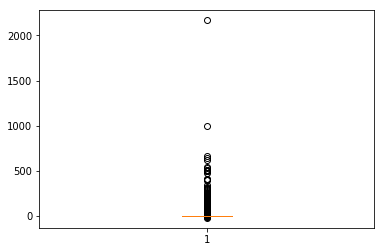

In [17]:
plt.boxplot(train_df["item_cnt_day"])
plt.show()

In [18]:
f = lambda x: x.split(".")
train_df['date_test'] =list(map(f, train_df['date']))
train_df['date_test'].head()

0    [02, 01, 2013]
1    [03, 01, 2013]
2    [05, 01, 2013]
3    [06, 01, 2013]
4    [15, 01, 2013]
Name: date_test, dtype: object

In [19]:
f = lambda x: x[2]+"."+x[1]
train_df['date'] =list(map(f, train_df['date_test']))
train_df['date'].head()

0    2013.01
1    2013.01
2    2013.01
3    2013.01
4    2013.01
Name: date, dtype: object

In [25]:
bins=[-1,2,5,8,11,14,17,20,23,26,29,32,35]
group_names=["2012.Winter","2013.Spring","2013.Summer","2013.Fall","2013.Winter","2014.Spring","2014.Summer","2014.Fall",\
             "2014.Winter","2015.Spring","2015.Summer","2015.Fall"]
train_df["date"]=pd.cut(train_df["date_block_num"],bins,labels=group_names)
train_index = train_df["date"].unique()
train_index

[2012.Winter, 2013.Spring, 2013.Summer, 2013.Fall, 2013.Winter, ..., 2014.Fall, 2014.Winter, 2015.Spring, 2015.Summer, 2015.Fall]
Length: 12
Categories (12, object): [2012.Winter < 2013.Spring < 2013.Summer < 2013.Fall ... 2014.Winter < 2015.Spring < 2015.Summer < 2015.Fall]

In [21]:
train_vlm = train_df.groupby("date")["item_cnt_day"].sum()
train_vlmct = train_df.groupby("date")["item_cnt_day"].count()
train_max = train_df.groupby("date")["item_cnt_day"].apply(max)
train_new = pd.concat([train_vlm, train_vlmct, train_max],axis=1)
train_new

,item_cnt_day,item_cnt_day,item_cnt_day
date,,,
2012.Winter,406711.0,345650,88.0
2013.Spring,339541.0,286271,200.0
2013.Summer,375589.0,301457,288.0
2013.Fall,440892.0,334184,255.0
2013.Winter,341883.0,281912,405.0
2014.Spring,291775.0,238843,502.0
2014.Summer,293209.0,238531,149.0
2014.Fall,394022.0,296575,512.0
2014.Winter,277183.0,230307,1000.0


In [22]:
train = train_new.as_matrix()
train.shape

(12, 3)

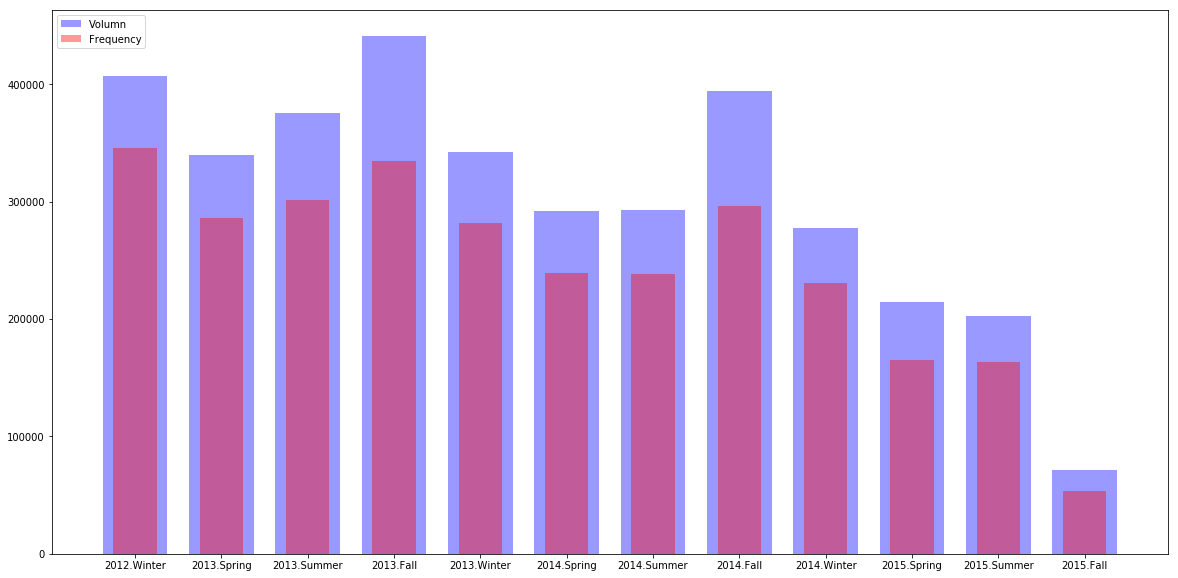

In [41]:
fig = plt.figure()
fig.set_size_inches(20,10)
X=np.arange(12)
plt.bar(X+0, train[:,0],color="b",width=0.75,alpha=0.4, label="Volumn")
plt.bar(X+0, train[:,1],color="r",width=0.50,alpha=0.4, label="Frequency")
plt.xticks(X, train_index)
plt.legend(loc="upper left")
plt.show()

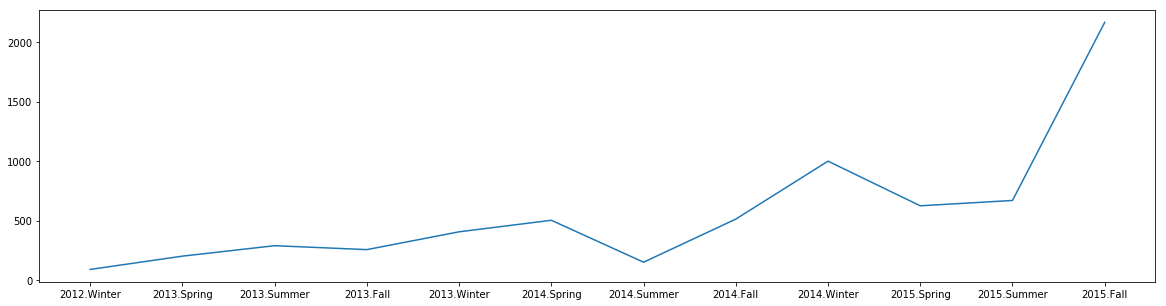

In [42]:
fig = plt.figure()
fig.set_size_inches(20,5)
plt.plot(X,train[:,2])
plt.xticks(X, train_index)
plt.show()

In [ ]:
# Data Preprocessing